<a href="https://colab.research.google.com/github/adityanandy2802/ml-dl-task/blob/main/SRIP_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We import the necessary libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We take a bunch of points between 0 and 20 with step size as 0.02 

In [2]:
x=torch.arange(0.02,20,0.02)

We define `normal_dist` class which takes `s` (standard deviation) and `m` (mean) as its parameters.
<center>Normal Distribution: $N=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$</center>



In [3]:
class normal_dist():
  def __init__(self, s, m):
    self.s=s
    self.m=m
  
  def func(self, x: torch.Tensor) -> torch.Tensor:
    y = (1/(self.s[0] * torch.sqrt(torch.tensor(2 * np.pi)))) * torch.exp(-0.5 * ((x-self.m[0])/self.s[0])**2)
    return y

We take 2 individual normal distributions and take a final distribution: addition of both of them
* The first distribution: $\mu=5, \sigma=2$
* The second distribution: $\mu=15, \sigma=3$
* Addition of these creates a bimodal distribution with 2 peaks of different heights

In [4]:
s1=torch.tensor([2.], requires_grad=True)
m1=torch.tensor([5.], requires_grad=True)
dist_1=normal_dist(s1,m1)

s2=torch.tensor([3.], requires_grad=True)
m2=torch.tensor([15.], requires_grad=True)
dist_2=normal_dist(s2,m2)

y1=dist_1.func(x)
y2=dist_2.func(x)
y=y1+y2

Plot

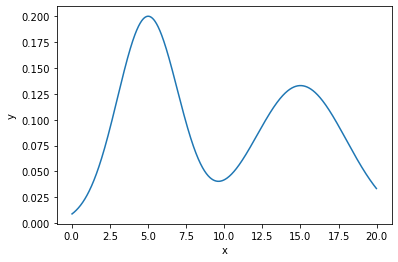

In [5]:
plt.plot(x,y.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

I define my KL Divergence function below.

<center>KL Divergence: $\Sigma P(i) \log\frac{P(i)}{Q(i)}$</center>

In [8]:
def kl_div(model, prediction) -> torch.Tensor:
  val=torch.sum(model*torch.log(model/prediction))
  return val

### Estimating the graph for a normal distribution

We take a random initial guess. 
Here I assumed $\mu=5$ and $\sigma=3$.

In [16]:
sdev=torch.tensor([3.], requires_grad=True)
mean=torch.tensor([5.], requires_grad=True)
pred_model_1=normal_dist(sdev,mean)

Initial Guess prediction vs actual graph

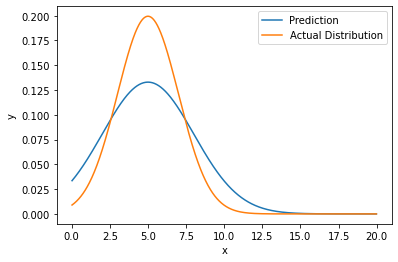

In [17]:
pred=pred_model_1.func(x)
plt.plot(x,pred.detach().numpy(), label="Prediction")
plt.plot(x,y1.detach().numpy(),label="Actual Distribution")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Initial KL-Divergence value

In [18]:
kl=kl_div(y1,pred)
kl

tensor(6.9592, grad_fn=<SumBackward0>)

Now we can try and find the parameters using an optimizer and treating our KL Divergence as our loss function.

In [19]:
pred_model=normal_dist(sdev,mean)
opt=torch.optim.SGD([sdev,mean], 1e-3)

We run this for 10000 epochs

In [20]:
for epoch in range(10000):
  pred_model=normal_dist(sdev,mean)

  pred=pred_model.func(x)

  kl=kl_div(y1, pred)

  kl.backward(retain_graph=True)
  
  opt.step()

  opt.zero_grad()

sdev, mean

(tensor([1.9546], requires_grad=True), tensor([5.0357], requires_grad=True))

Final Plot

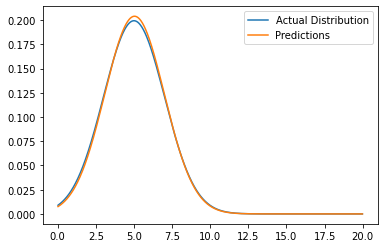

In [23]:
final_pred_model=normal_dist(sdev, mean)
plt.plot(x,(y1).detach().numpy(), label="Actual Distribution")
plt.plot(x,final_pred_model.func(x).detach().numpy(), label="Predictions")
plt.legend()
plt.show()

### Estimating the graph for addition of 2 distributions

We take a random initial guess. 
Here I assumed $\mu=5$ and $\sigma=3$.

In [24]:
sdev=torch.tensor([3.], requires_grad=True)
mean=torch.tensor([5.], requires_grad=True)
pred_model_1=normal_dist(sdev,mean)

Initial Guess prediction vs actual graph

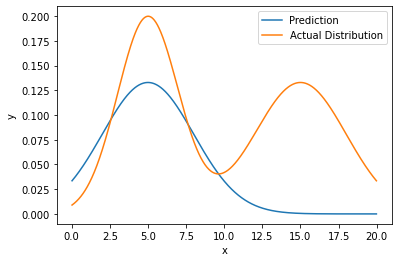

In [25]:
pred=pred_model_1.func(x)
plt.plot(x,pred.detach().numpy(), label="Prediction")
plt.plot(x,y.detach().numpy(),label="Actual Distribution")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Initial KL-Divergence value

In [26]:
kl=kl_div(y,pred)
kl

tensor(260.8112, grad_fn=<SumBackward0>)

Now we can try and find the parameters using an optimizer and treating our KL Divergence as our loss function.

In [27]:
pred_model=normal_dist(sdev,mean)
opt=torch.optim.SGD([sdev,mean], 1e-3)

We run this for 10000 epochs

In [28]:
for epoch in range(10000):
  pred_model=normal_dist(sdev,mean)

  pred=pred_model.func(x)

  kl=kl_div(y, pred)

  kl.backward(retain_graph=True)
  
  opt.step()

  opt.zero_grad()

sdev, mean

(tensor([5.3667], requires_grad=True), tensor([9.7564], requires_grad=True))

Final plot

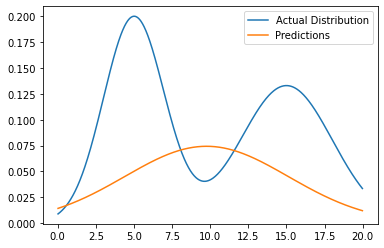

In [31]:
final_pred_model=normal_dist(sdev, mean)
plt.plot(x,(y).detach().numpy(), label="Actual Distribution")
plt.plot(x,final_pred_model.func(x).detach().numpy(),label="Predictions")
plt.legend()
plt.show()